# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

In [14]:
import pandas as pd
df = pd.read_csv('human_body_temperature.csv')

# Question 1
Is the distribution of body temperatures normal?
Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

In [15]:
# Your work here.
df.head()

# let's just generate the first five row to see what the dataset is all about
# So the variables are temperatures, gender and heart rate

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [16]:
df.count()
# Count the number of rows for each variables and its data types

temperature    130
gender         130
heart_rate     130
dtype: int64

In [17]:
df.info()
# Ensure no data is missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [18]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from scipy.stats import norm
import scipy.stats as stats
import math

mean= df.temperature.mean()
mode=df.temperature.mode()
std= df.temperature.std()
k2, pvalue = stats.normaltest(df.temperature)

The observation has to be done in a probability distribution function

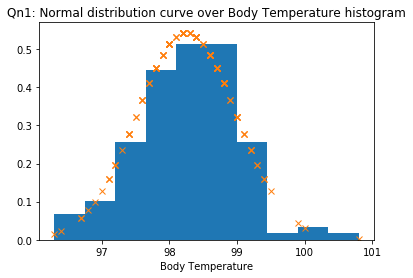

In [19]:
# A histogram can be plotted to depict the distribution
plt.hist(df.temperature, normed =True)
normcurve =stats.norm.pdf(df.temperature, mean, std)
plt.plot(df.temperature, normcurve, 'x')
plt.xlabel('Body Temperature')
plt.title('Qn1: Normal distribution curve over Body Temperature histogram')

Another method to determine the distribution is normal is by using Q-Q plot

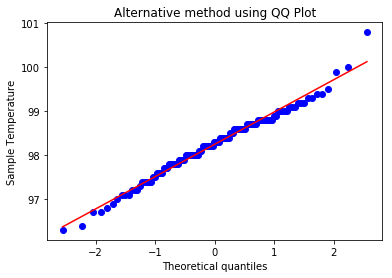

The mean, mode and standard deviation of the Body Temp are 98.2492307692, 0    98.0
dtype: float64, 0.733183158039 respectively
pvalue =0.258747986349


In [20]:
import pylab
stats.probplot(df.temperature, dist="norm", plot =pylab)
pylab.title ("Alternative method using QQ Plot")
pylab.ylabel("Sample Temperature")
pylab.show()
print('The mean, mode and standard deviation of the Body Temp are ' + format(str(mean)) + ', '+ format(str(mode))+', '+
      format(str(std)) + ' respectively')  
print('pvalue =' + str(pvalue))

When the curve is compared with the histogram, the bell shaped curve produced a p value of 0.25 for a sample quantity of  130 . It can be said that the dataset follow a Normal distribution. 

# Question 2. 
Is the sample size large? Are the observations independent?
Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.


For a sample size large than 30 and the normal distribution not skewed, it can considered that the sample is large and the observations of a human's body temperature are independent of its population.

# Question 3.
Is the true population mean really 98.6 degrees F?
Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  t or  z statistic?

When the questions ask about the true population mean value to be 98.6, we can perform a hypthesis testing to prove the value is valid or not.

# Ho: True population temperature mean is 98.6 F
# H1: True population temperature mean is not 98.6 F

Since pop variance is unknown, need to find t-value. 1 sample testing is used for a group of same category;gender. A comparison with Z statistic will be made for sample size greater than 30.
finding the statistical observation of the data require variables such as the sample mean and population variance

In [21]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

In [22]:
z_val= (mean- 98.6)/(df.temperature.std()/(np.sqrt(130)))
print(z_val)

-5.45482329236


Finding the the P(true mean is within the z std of sample mean98.2 F)

In [23]:
ztest_pval= stats.norm.sf(abs(z_val))*2
print(ztest_pval)

4.90215701411e-08


p is less than 0.05, hence H0 is rejected, the true population mean is not 98.6 F

# Z statistics vs. T statistics

In [24]:
stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

z_val and t_val outputs the same values, if further computed, critical t will yield the same results for the range used in z and t statistics

# Though the z test appear smaller than the t test qualittatively, for sample >130, the quantitative results is similar. 

# Question 4 
At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval.

To go about solving the temperature abnormality region, we have to compute the upper and lower limits of a testing/CI (confidence interval) and its margin of error

In [25]:
error_margin= 1.96*std /np.sqrt(130)
CI=mean +np.array ([-1,1])*error_margin
print(error_margin)
print(CI)

0.126036657002
[ 98.12319411  98.37526743]


The abnormal range would be in between 98.12 and 98.38 F

# Question 5
Is there a significant difference between males and females in normal temperature?
What test did you use and why?
Write a story with your conclusion in the context of the original problem.

In [26]:
#Since now the gender is put in category for the respective temperature, we can apply two sample t test computation.
male_temp=df[df.gender == "M"]
df_maletemp= male_temp.temperature
df_maletemp.describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

In [27]:
female_temp=df[df.gender == "F"]
df_femaletemp=female_temp.temperature
df_femaletemp.describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

In [30]:
#Both male and female temperature mean is below the population mean, we have to calculate two sample t test
stats.ttest_ind(df_maletemp, df_femaletemp, equal_var = False)

Ttest_indResult(statistic=-2.2854345381656112, pvalue=0.023938264182934196)

In [31]:
#Finding the critical t is also essential to the two sample t test with the population mean of 98.6
critt = stats.t.ppf(0.975, len(df.temperature) - 1)
interval = critt*df.temperature.std()*np.sqrt((1 + 1/(len(df.temperature))))
[98.6 - interval, 98.6 + interval]

[97.14937916509497, 100.05062083490502]

# At a categorized observation of temperature by gender, the range is slightly larger than that of it combined, this result proves that individually the temperature of female and male has separate requirements for measuring their respective temperature. Therefore, it can be recommended to the metrology that the thermometer used in the clinic/hospital should be calibrated based on gender.